In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [21]:
df = pd.read_csv("airmiles.csv", index_col="Date", dayfirst=True, parse_dates=True)
df.head()

,airmiles
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391


In [22]:
df = df.asfreq('MS')
df.index
df.head()

,airmiles
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391


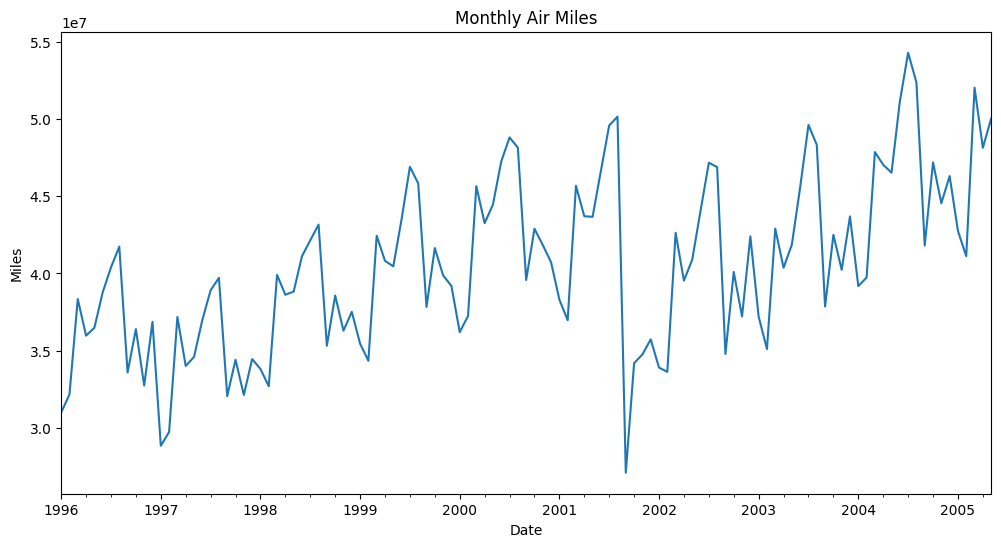

In [23]:
df['airmiles'].plot(figsize=(12, 6), title='Monthly Air Miles', ylabel='Miles')
plt.show()

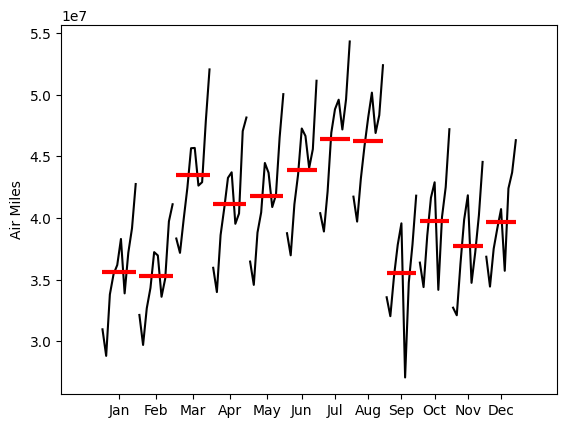

In [27]:
month_plot(df['airmiles'].resample('MS').mean() ,ylabel='Air Miles')
plt.show()

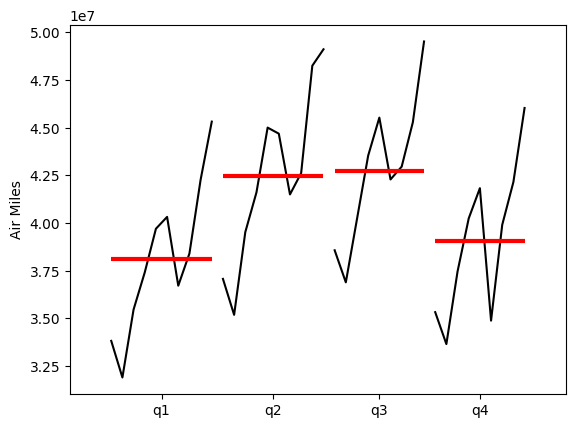

In [28]:
quarter_plot(df['airmiles'].resample('QS').mean() ,ylabel='Air Miles')
plt.show()

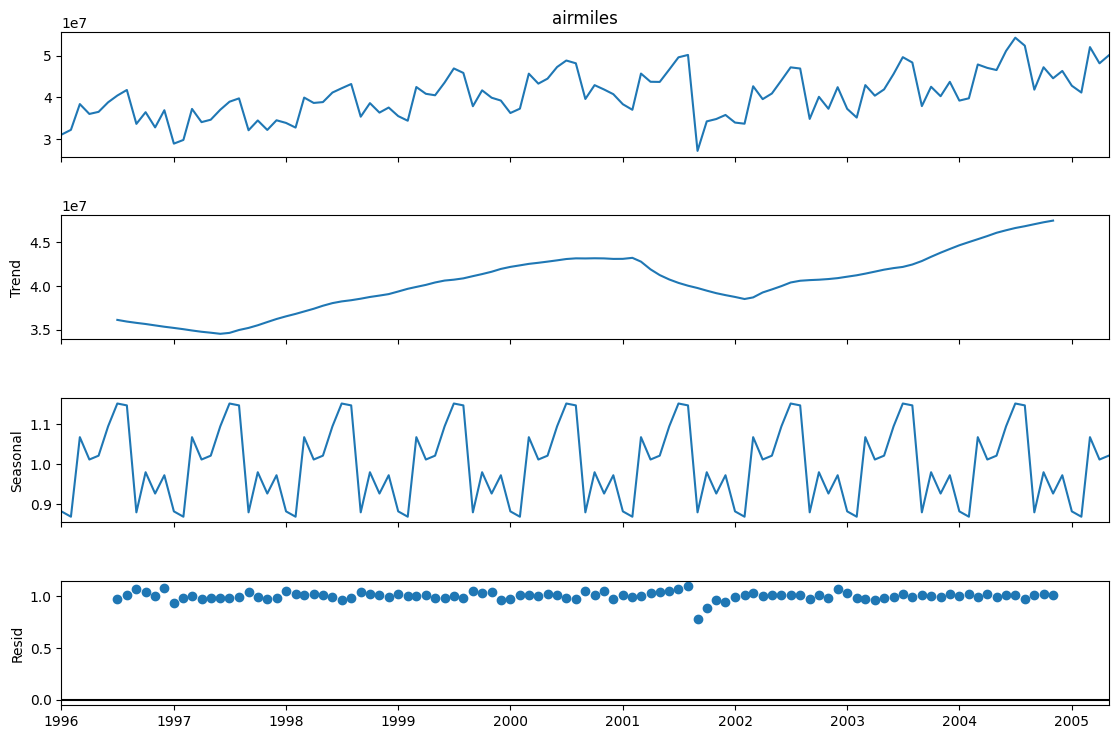

In [39]:
result = seasonal_decompose(df['airmiles'], model='multiplicative', period=12)
fig = result.plot()
fig.set_size_inches(12, 8)
plt.show()

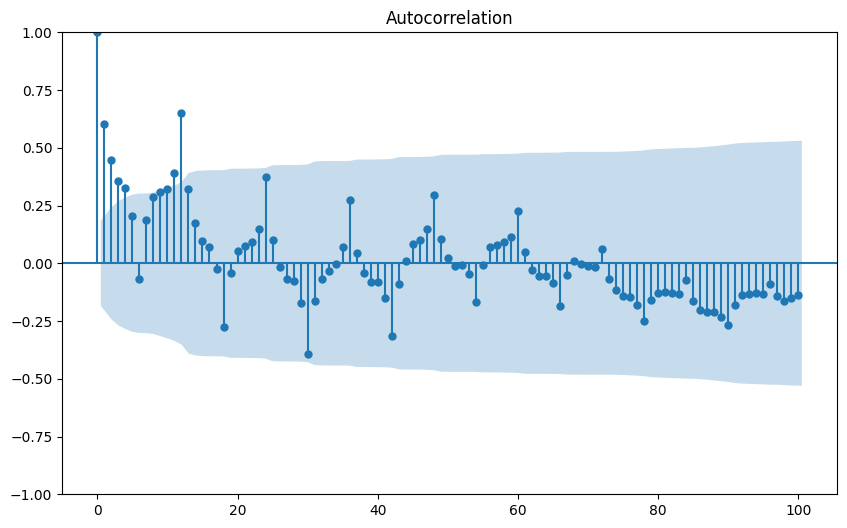

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(df['airmiles'].dropna(), lags=100, ax=ax)
plt.show()

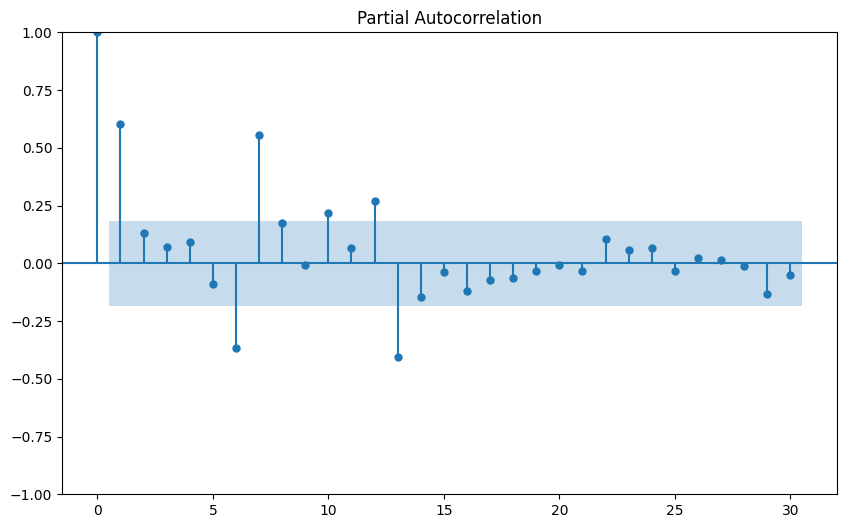

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(df['airmiles'].dropna(), lags=30, ax=ax)
plt.show()

In [45]:
periods = 12
train, test = df.iloc[:-periods,0], df.iloc[-periods:,0]

test

Date
2004-06-01    51134050
2004-07-01    54317314
2004-08-01    52392985
2004-09-01    41816777
2004-10-01    47205665
2004-11-01    44553653
2004-12-01    46316602
2005-01-01    42760657
2005-02-01    41120838
2005-03-01    52053059
2005-04-01    48152585
2005-05-01    50047901
Freq: MS, Name: airmiles, dtype: int64

In [55]:
model = ExponentialSmoothing(train, trend='mul', seasonal = 'mul', seasonal_periods = 12).fit()
predictions = model.forecast(len(test))
predictions

c:\Python\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2004-06-01    4.989814e+07
2004-07-01    5.232020e+07
2004-08-01    5.246731e+07
2004-09-01    4.147231e+07
2004-10-01    4.632250e+07
2004-11-01    4.366543e+07
2004-12-01    4.583298e+07
2005-01-01    4.142760e+07
2005-02-01    4.104454e+07
2005-03-01    5.053423e+07
2005-04-01    4.798055e+07
2005-05-01    4.852405e+07
Freq: MS, dtype: float64

In [56]:
def assess_model(train, test, predictions, model_name):
    plt.figure(figsize=(12, 6))
    plt.plot(train, label='Train', color='blue')
    plt.plot(test, label='Test', color='orange')
    plt.plot(predictions, label=f'{model_name} Predictions', color='green')
    plt.title(f'{model_name} Predictions')
    plt.legend()
    plt.show()

    mae = mean_absolute_error(test, predictions)
    print(f'Mean Absolute Error (MAE) for {model_name}: {mae:.2f}')
    rmse = mean_squared_error(test, predictions)  
    rmse = rmse ** 0.5
    print(f'Root Mean Squared Error (RMSE) for {model_name}: {rmse:.2f}')
    mape = mean_absolute_percentage_error(test, predictions)        
    print(f'Mean Absolute Percentage Error (MAPE) for {model_name}: {mape:.2%}') 

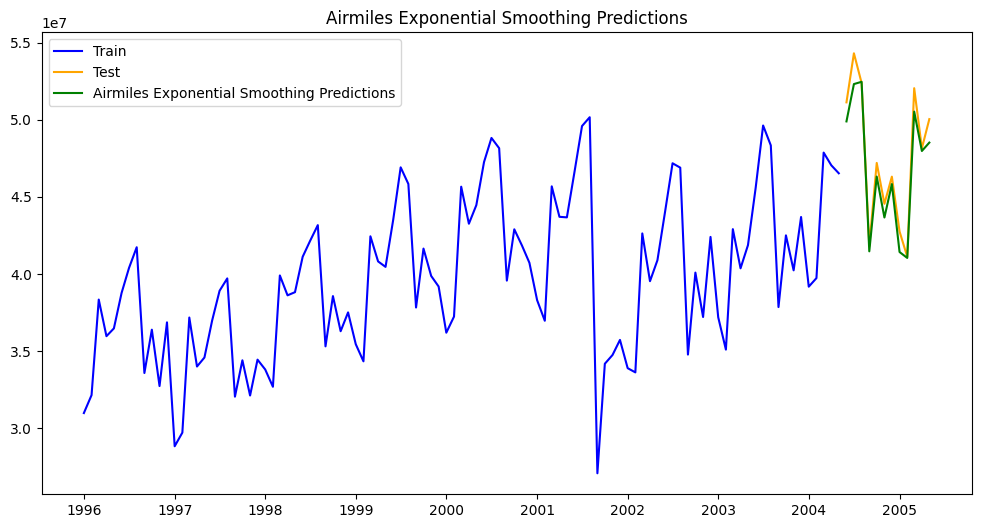

Mean Absolute Error (MAE) for Airmiles Exponential Smoothing: 877575.16
Root Mean Squared Error (RMSE) for Airmiles Exponential Smoothing: 1075653.07
Mean Absolute Percentage Error (MAPE) for Airmiles Exponential Smoothing: 1.80%


In [57]:
assess_model(train, test, predictions, 'Airmiles Exponential Smoothing')

In [58]:
def forecast_and_plot(dataset, model, periods, title):
    forecast = model.forecast(periods)
    plt.figure(figsize=(12, 6))
    plt.plot(dataset, label='Historical Data', color='blue')
    plt.plot(forecast, label='Forecast', color='green')
    plt.title(title)
    plt.legend()
    plt.show()
    return forecast

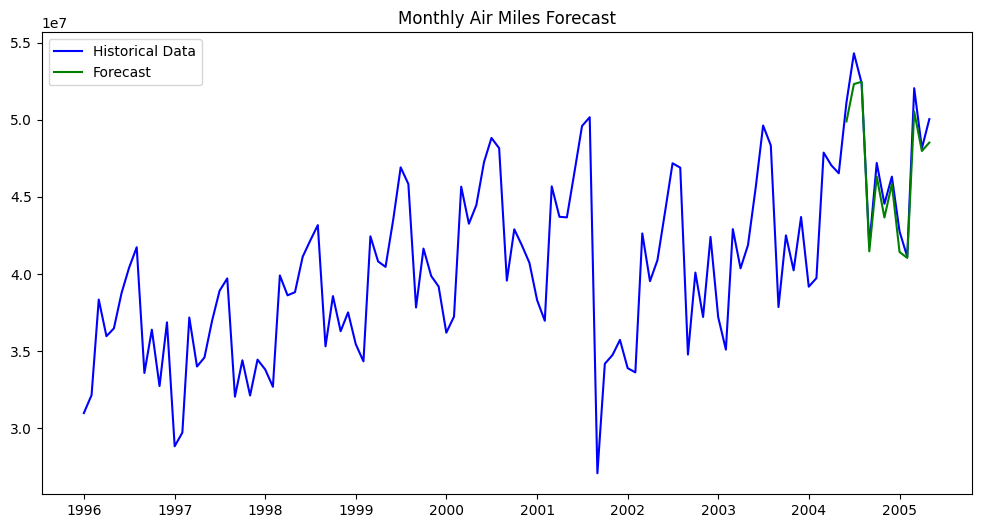

In [59]:
forecast = forecast_and_plot(df.airmiles, model, periods, 'Monthly Air Miles Forecast')